In [9]:
import pandas as pd
import numpy as np
import astropy as ap
from astropy import units as u
from astropy.coordinates import SkyCoord
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import astropy as ap
from astropy import units as u
from astropy.coordinates import SkyCoord
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table

In [6]:
cosmo=FlatLambdaCDM(H0=70,Om0=0.3)

In [7]:
kcordir=os.environ["KCORRECT_DIR"]
catbasedir=os.environ["COSMOS_DIR"]

In [10]:
COSMOS_PHOT_LAMBDAR=pd.read_csv(catbasedir+'/Photometry/G10CosmosLAMBDARCatv05.csv')
COSMOS_FLUXES=COSMOS_PHOT_LAMBDAR
laigle_table=Table.read(catbasedir+'/Photometry/COSMOS2015_Laigle_v1.1.fits')
initial_laigle_df=laigle_table.to_pandas()

/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'ID_XMM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'ID_CHANDRA09' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: TableReplaceWarning: converted column 'FLAG_XRAYBLEND' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
laigle_df=initial_laigle_df.loc[(initial_laigle_df.FLAG_HJMCC==0) &
                                (initial_laigle_df.FLAG_COSMOS==1) & 
                                (initial_laigle_df.FLAG_PETER==0)][['NUMBER',
                                                                    'ID2006',
                                                                    'ID2008',
                                                                    'ID2013',
                                                                    'ALPHA_J2000',
                                                                    'DELTA_J2000',
                                                                    'FLUX_RADIUS',
                                                                    'u_MAG_AUTO',
                                                                    'u_MAGERR_AUTO',
                                                                    'B_MAG_AUTO',
                                                                    'B_MAGERR_AUTO',
                                                                    'V_MAG_AUTO',
                                                                    'V_MAGERR_AUTO',
                                                                    'r_MAG_AUTO',
                                                                    'r_MAGERR_AUTO',
                                                                    'ip_MAG_AUTO',
                                                                    'ip_MAGERR_AUTO',
                                                                    'zpp_MAG_AUTO',
                                                                    'zpp_MAGERR_AUTO',
                                                                    'Y_MAG_AUTO',
                                                                    'Y_MAGERR_AUTO',
                                                                    'J_MAG_AUTO',
                                                                    'J_MAGERR_AUTO',
                                                                    'H_MAG_AUTO',
                                                                    'H_MAGERR_AUTO',
                                                                    'Ks_MAG_AUTO',
                                                                    'Ks_MAGERR_AUTO',
                                                                    'ZPDF',
                                                                    'TYPE',
                                                                    'EXTINCTION',
                                                                    'EBV'
]]
final_catalog=laigle_df.loc[laigle_df.ip_MAG_AUTO<25]

In [12]:
column_headers=COSMOS_FLUXES.columns.values
telescope_flux_headers=[s for s in column_headers if (('subaru' in s) or ('uvista' in s) or ('galex' in s) or ('cfht' in s) or ('irac' in s) or ('mips' in s) or ('pacs' in s) or ('spire' in s)) and ('err' not in s)]
zeropoints=[18.82, 20.08, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 30.0, 30.0, 30.0, 30.0, 21.58, 21.58, 21.58, 21.58, 20.15, 17.53, 8.9, 8.9, 8.9, 8.9, 8.9, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4, 31.4]
for i in telescope_flux_headers:
    COSMOS_FLUXES['mag_'+i]=-2.5*np.log10(COSMOS_FLUXES[i]/3631)
    COSMOS_FLUXES['mag_'+i+'_err']=2.5/np.log(10)*COSMOS_FLUXES[i+'_err']/COSMOS_FLUXES[i]
    COSMOS_FLUXES['maggies_'+i]=np.nan
    COSMOS_FLUXES['invervar_'+i]=np.nan

COSMOS_FLUXES.loc[COSMOS_FLUXES.isnull().mag_galex_fuv,'mag_galex_fuv_err']=np.nan
COSMOS_FLUXES.loc[COSMOS_FLUXES.isnull().mag_galex_nuv,'mag_galex_nuv_err']=np.nan

/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/lucashunt/programs/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


In [16]:
apparent_magnitude=final_catalog.loc[final_catalog.B_MAG_AUTO<80,'H_MAG_AUTO']-final_catalog.loc[final_catalog.B_MAG_AUTO<80,'EBV']*final_catalog.loc[final_catalog.B_MAG_AUTO<80,'EXTINCTION']

In [26]:
list(COSMOS_FLUXES.columns)

['CATAID',
 'COSMOS_ID_06',
 'COSMOS_ID_08',
 'COSMOS_ID_13',
 'I_MAG_AUTO',
 'RA',
 'DEC',
 'RA_06',
 'DEC_06',
 'RA_COSMOS2015',
 'DEC_COSMOS2015',
 'LAMBDAR_COSMOS2006_sep',
 'LAMBDAR_COSMOS2015_sep',
 'EBV',
 'SEMIMAJ_AS',
 'SEMIMIN_AS',
 'THETA_J2000',
 'SG_ILBERT',
 'SG_MAGSIZE',
 'SG_COSMOS2015',
 'SG_EYE',
 'SG_MASTER',
 'MASK_COSMOS2015',
 'galex_fuv',
 'galex_fuv_err',
 'galex_nuv',
 'galex_nuv_err',
 'cfht_u',
 'cfht_u_err',
 'subaru_B',
 'subaru_B_err',
 'subaru_V',
 'subaru_V_err',
 'subaru_g',
 'subaru_g_err',
 'subaru_r',
 'subaru_r_err',
 'subaru_i',
 'subaru_i_err',
 'subaru_z',
 'subaru_z_err',
 'uvista_Y',
 'uvista_Y_err',
 'uvista_J',
 'uvista_J_err',
 'uvista_H',
 'uvista_H_err',
 'uvista_K',
 'uvista_K_err',
 'irac_1',
 'irac_1_err',
 'irac_2',
 'irac_2_err',
 'irac_3',
 'irac_3_err',
 'irac_4',
 'irac_4_err',
 'mips_24',
 'mips_24_err',
 'mips_70',
 'mips_70_err',
 'pacs_100',
 'pacs_100_err',
 'pacs_160',
 'pacs_160_err',
 'spire_250',
 'spire_250_err',
 'spire_

42.35655511306917


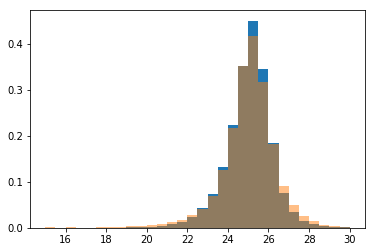

In [35]:
plt.hist(final_catalog.B_MAG_AUTO,bins=30,range=(15,30),density=True)
plt.hist(COSMOS_FLUXES.mag_subaru_B,bins=30,range=(15,30),density=True,alpha=0.5)
print(max(COSMOS_FLUXES.loc[COSMOS_FLUXES.mag_subaru_B<100,'mag_subaru_B']))